# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

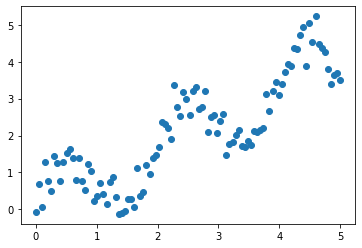

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5708271867831801


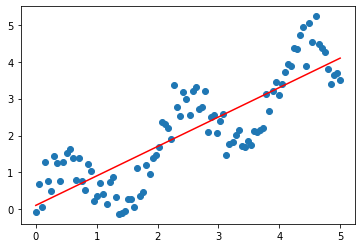

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

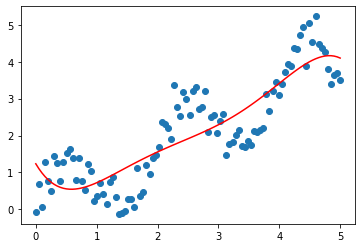

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.79759525  3.62635788 -1.6653456   0.34966742 -0.02693795]
interception:  1.235094282964032


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.23509428, 1.10283929, 0.98782858, 0.88885548, 0.80476581,
       0.73445679, 0.67687599, 0.6310203 , 0.59593479, 0.57071175,
       0.55448952, 0.54645153, 0.54582515, 0.5518807 , 0.56393033,
       0.58132699, 0.60346336, 0.6297708 , 0.65971826, 0.69281125,
       0.72859073, 0.76663212, 0.80654417, 0.84796793, 0.89057568,
       0.93406989, 0.97818212, 1.02267197, 1.06732603, 1.11195683,
       1.15640173, 1.2005219 , 1.24420125, 1.28734535, 1.32988039,
       1.37175211, 1.41292473, 1.45337988, 1.49311558, 1.53214514,
       1.57049608, 1.60820913, 1.64533711, 1.6819439 , 1.71810338,
       1.75389832, 1.78941939, 1.82476404, 1.86003547, 1.89534154,
       1.93079374, 1.96650612, 2.0025942 , 2.03917393, 2.07636064,
       2.11426796, 2.15300674, 2.19268403, 2.233402  , 2.27525685,
       2.3183378 , 2.36272599, 2.40849342, 2.45570189, 2.50440197,
       2.55463189, 2.6064165 , 2.65976622, 2.71467594, 2.771124  ,
       2.82907111, 2.88845928, 2.94921077, 3.01122703, 3.07438

In [15]:
regr_poly.predict(X_poly)

array([1.23509428, 1.10283929, 0.98782858, 0.88885548, 0.80476581,
       0.73445679, 0.67687599, 0.6310203 , 0.59593479, 0.57071175,
       0.55448952, 0.54645153, 0.54582515, 0.5518807 , 0.56393033,
       0.58132699, 0.60346336, 0.6297708 , 0.65971826, 0.69281125,
       0.72859073, 0.76663212, 0.80654417, 0.84796793, 0.89057568,
       0.93406989, 0.97818212, 1.02267197, 1.06732603, 1.11195683,
       1.15640173, 1.2005219 , 1.24420125, 1.28734535, 1.32988039,
       1.37175211, 1.41292473, 1.45337988, 1.49311558, 1.53214514,
       1.57049608, 1.60820913, 1.64533711, 1.6819439 , 1.71810338,
       1.75389832, 1.78941939, 1.82476404, 1.86003547, 1.89534154,
       1.93079374, 1.96650612, 2.0025942 , 2.03917393, 2.07636064,
       2.11426796, 2.15300674, 2.19268403, 2.233402  , 2.27525685,
       2.3183378 , 2.36272599, 2.40849342, 2.45570189, 2.50440197,
       2.55463189, 2.6064165 , 2.65976622, 2.71467594, 2.771124  ,
       2.82907111, 2.88845928, 2.94921077, 3.01122703, 3.07438

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

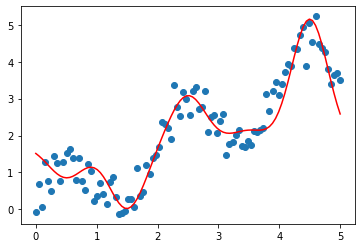

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.87063068 -1.71193431  1.35542941  0.39705956  3.42084224]
interception:  1.7321023878275388


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

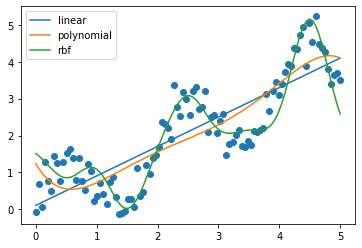

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5708271867831801


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5030331751346853


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.224775139427959
